<a href="https://colab.research.google.com/github/JARVIS7786/Elevate_Labs/blob/main/Sql_lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Summary:
              product  total_qty  revenue
0             Apples         15     37.5
1            Bananas         30     45.0
2        Cargo Pants         20    600.0
3       Korean Pants         28    980.0
4            Oranges         15     45.0
5     Trousers Pants         32    800.0
6  Wide-Leg Trousers         10    400.0


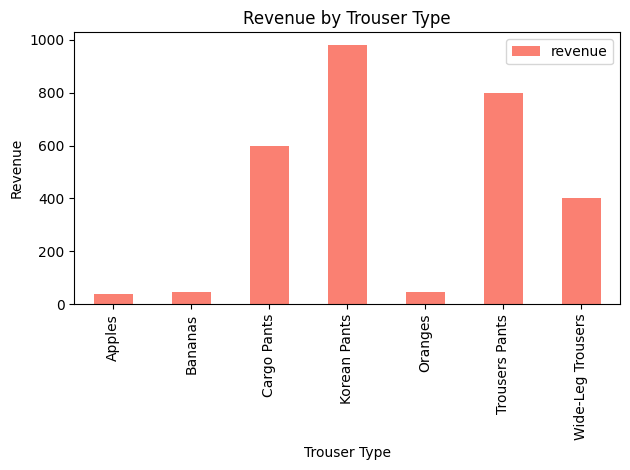

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')


sample_data = [
    ("Korean Pants", 8, 35.0),
    ("Trousers Pants", 12, 25.0),
    ("Wide-Leg Trousers", 5, 40.0),
    ("Cargo Pants", 10, 30.0),
    ("Korean Pants", 6, 35.0),
    ("Trousers Pants", 4, 25.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)


print("Sales Summary:\n", df)


df.plot(kind='bar', x='product', y='revenue', color='salmon', title='Revenue by Trouser Type')
plt.xlabel("Trouser Type")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("trouser_sales_chart.png")
plt.show()


conn.close()
